In [1]:
library(tidyverse)

Warning message:
“Installed Rcpp (0.12.14) different from Rcpp used to build dplyr (0.12.13).
Please reinstall dplyr to avoid random crashes or undefined behavior.”Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
performance_path <- '../performance/exp2/'
file_list <- list.files(performance_path)
path_list <- paste0(performance_path, file_list)

In [3]:
i = 0
for (path in path_list) {
    i = i + 1
    
    the_df <- read_csv(path)
    
    if (i == 1) {
        results_df <- the_df
        
    } else {
        results_df <- rbind(results_df, the_df)
    }
    
}

Parsed with column specification:
cols(
  config_str = col_character(),
  phase = col_character(),
  epoch = col_integer(),
  Metric = col_character(),
  Performance = col_double(),
  action_dim = col_integer(),
  batch_size = col_integer(),
  drop_prob = col_double(),
  gamma = col_double(),
  hidden_dim = col_integer(),
  lr = col_double(),
  num_epochs = col_integer(),
  num_hidden = col_integer(),
  option = col_character(),
  state_dim = col_integer(),
  target_update = col_integer(),
  use_scheduler = col_character()
)
Parsed with column specification:
cols(
  config_str = col_character(),
  phase = col_character(),
  epoch = col_integer(),
  Metric = col_character(),
  Performance = col_double(),
  action_dim = col_integer(),
  batch_size = col_integer(),
  drop_prob = col_double(),
  gamma = col_double(),
  hidden_dim = col_integer(),
  lr = col_double(),
  num_epochs = col_integer(),
  num_hidden = col_integer(),
  option = col_character(),
  state_dim = col_integer(),
  targe

Parsed with column specification:
cols(
  config_str = col_character(),
  phase = col_character(),
  epoch = col_integer(),
  Metric = col_character(),
  Performance = col_double(),
  action_dim = col_integer(),
  batch_size = col_integer(),
  drop_prob = col_double(),
  gamma = col_double(),
  hidden_dim = col_integer(),
  lr = col_double(),
  num_epochs = col_integer(),
  num_hidden = col_integer(),
  option = col_character(),
  state_dim = col_integer(),
  target_update = col_integer(),
  use_scheduler = col_character()
)
Parsed with column specification:
cols(
  config_str = col_character(),
  phase = col_character(),
  epoch = col_integer(),
  Metric = col_character(),
  Performance = col_double(),
  action_dim = col_integer(),
  batch_size = col_integer(),
  drop_prob = col_double(),
  gamma = col_double(),
  hidden_dim = col_integer(),
  lr = col_double(),
  num_epochs = col_integer(),
  num_hidden = col_integer(),
  option = col_character(),
  state_dim = col_integer(),
  targe

In [4]:
x_levels <- sort(unique(results_df$hidden_dim))
print(as.character(x_levels))

[1] "128"  "256"  "512"  "1024"


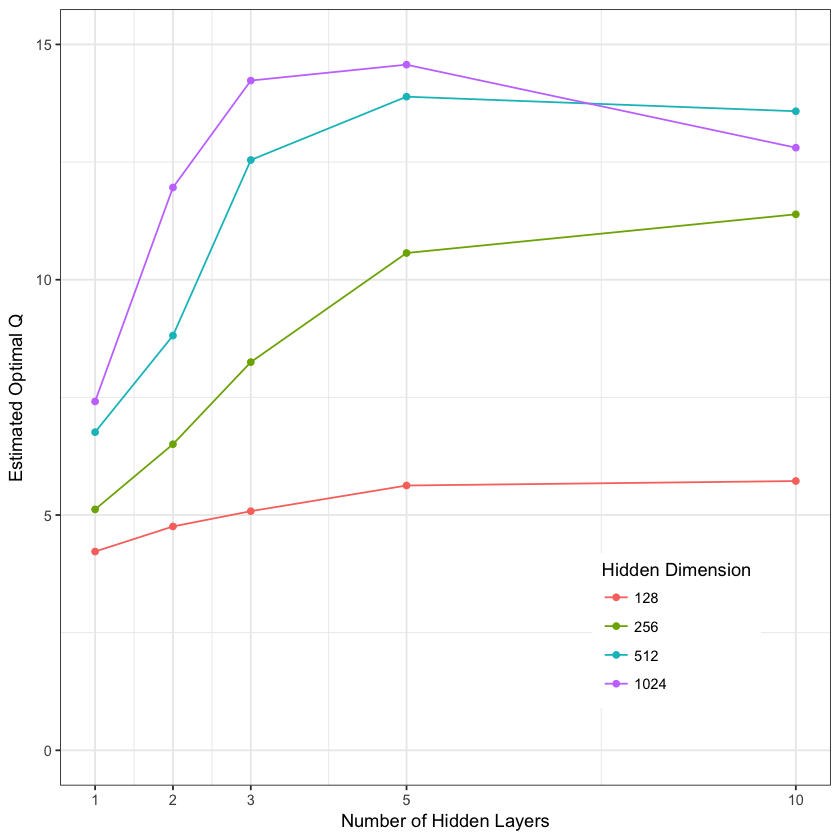

In [16]:
results_df %>% 
                group_by(config_str, phase, Metric, num_hidden, hidden_dim) %>%
                summarise(Performance = max(Performance)) %>%
                filter(phase == 'val',
                       Metric == 'value') %>%
                ggplot(aes(num_hidden, Performance, color = as.factor(hidden_dim))) + 
                    geom_point() + 
                    geom_line() + 
                    xlab('Number of Hidden Layers') + 
                    ylab('Estimated Optimal Q') + 
                    scale_x_continuous(breaks = c(1, 2,3, 5, 10)) + 
                    scale_color_discrete('Hidden Dimension') + theme_bw() +
                    theme(legend.position = c(0.8, 0.2),
                          legend.key=element_blank()) + 
                    ylim(0, 15)

In [17]:
ggsave('../figures/hyperparams_plot.png', width = 6, height = 6, units = 'in')

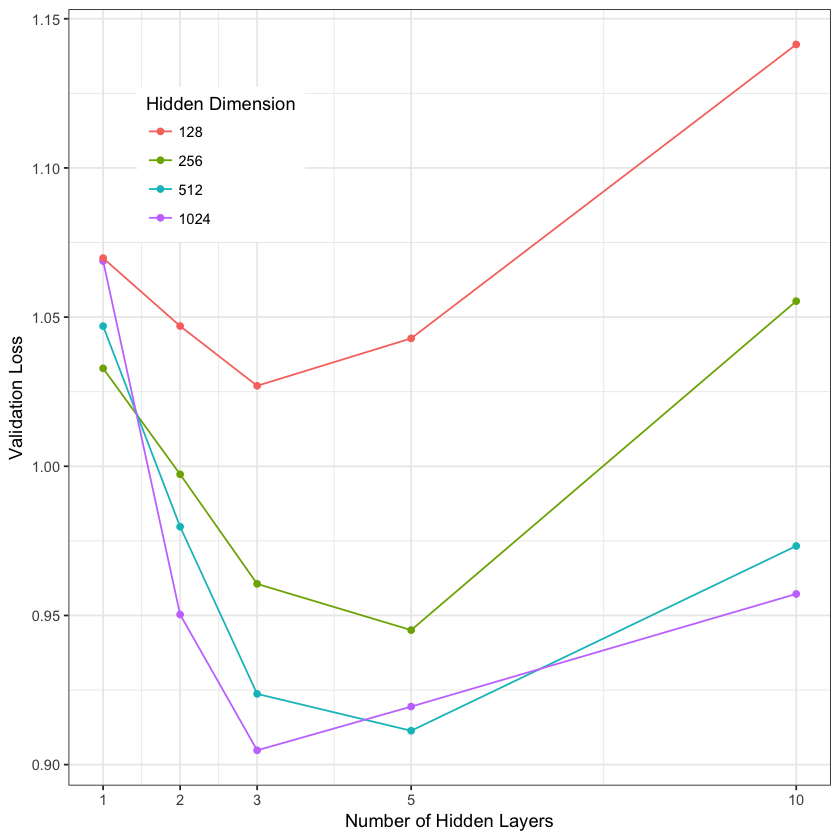

In [21]:
results_df %>% 
                group_by(config_str, phase, Metric, num_hidden, hidden_dim) %>%
                summarise(Performance = min(Performance)) %>%
                filter(phase == 'val',
                       Metric == 'loss') %>%
                ggplot(aes(num_hidden, Performance, color = as.factor(hidden_dim))) + 
                    geom_point() + 
                    geom_line() + 
                    xlab('Number of Hidden Layers') + 
                    ylab('Validation Loss') + 
                    scale_x_continuous(breaks = c(1, 2,3, 5, 10)) + 
                    scale_color_discrete('Hidden Dimension') + theme_bw() +
                    theme(legend.position = c(0.2, 0.8),
                          legend.key=element_blank()) #+ 
#                     ylim(0, 15)

In [22]:
ggsave('../figures/hyperparams_plot_loss.png', width = 6, height = 6, units = 'in')